In [7]:
from extract_data import *
import numpy as np

cat_data = load_list('pickle_data', 'cat_data')
tilts = get_tilt_timeseries(cat_data)
y = get_labels(cat_data)

mags = get_mags(tilts)

tilts = np.reshape(tilts, (tilts.shape[0],216))
tilts = np.hstack((tilts,mags))

x = tilts
num_features = (x.shape[1])

100%|██████████| 95/95 [00:00<00:00, 1637.77it/s]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential()

model.add(Dense(128, input_dim= num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=BinaryCrossentropy(), optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), epochs=500)



Epoch 1/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.8471
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.8471
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.8353
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.8118
Epoch 5/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.8118
Epoch 6/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.8000
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.8000
Epoch 8/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.7882
Epoch 9/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.8000
Epoch 10/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.7765
Epoch 11/500
3/3 [===========

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.2000


Text(0, 0.5, 'accuracy')

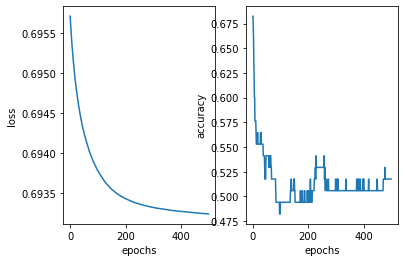

In [11]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [12]:
y_preds = model.predict(x_test)
y_train_preds = model.predict(x_train)
print(y_test)
print(y_preds)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[[0.48743698 0.51256305]
 [0.4964374  0.5035626 ]
 [0.4673665  0.5326335 ]
 [0.49805415 0.5019459 ]
 [0.5563336  0.44366643]
 [0.49559486 0.5044051 ]
 [0.5001325  0.4998675 ]
 [0.49844855 0.50155145]
 [0.49382654 0.50617343]
 [0.47947896 0.52052104]]
